<a href="https://colab.research.google.com/github/espartaca75-prog/LMC--FCE---UBA/blob/main/5_Matrices_y_Leontief.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Laboratorio de métodos cuantitativos aplicados a la Gestión**

---


Clase 5 - Matrices en Python

¿Qué vamos a poder hacer?

🔍 Detectar y filtrar información relevante, como productos con bajo stock, categorías más frecuentes o proveedores más importantes.

🧮 Realizar operaciones con matrices en Python y entender cómo aplicarlas en contextos reales.

🧩 Construir e interpretar el modelo insumo-producto de Leontief, entendiendo cómo interactúan los sectores productivos de una economía.

🏗️ Diseñar y resolver problemas organizacionales simples a partir de data estructurada.

In [ ]:
#importamos las librerías que vamos a usar en esta ocasión
import numpy as np
import pandas as pd



# Matrices

In [ ]:
#así armamos una matriz

A = np.array([[1, 4],
              [0, 6]]) #notemos que cada fila está encerrada en corchetes
I= np.identity(2)
print(A)
print(I)


[[1 4]
 [0 6]]
[[1. 0.]
 [0. 1.]]


In [ ]:
#algunas operaciones básicas

# Suma de matrices
C = A + A

# Multiplicación de matrices
D = A @ A

# Transpuesta
A_T = A.T

# Inversa (si existe)
A_inv = np.linalg.inv(A)

print("A+A:")
print(C)
print("\n------------------------\n")

print("A x A")
print(D)
print("\n------------------------\n")

print("Transpuesta de A")
print(A_T)


A+A:
[[ 2  8]
 [ 0 12]]

------------------------

A x A
[[ 1 28]
 [ 0 36]]

------------------------

Transpuesta de A
[[1 0]
 [4 6]]


In [ ]:
#algunas características de las matrices
#orden
print(A.shape)
#rango
rango_A=np.linalg.matrix_rank(A)
print(rango_A)
#traza
print(np.trace(A))

(2, 2)
2
7


In [ ]:
R= np.array([[0,1],
             [0,1]])


In [ ]:
#calculemos determinantes
det_R=np.linalg.det(R)
det_A=np.linalg.det(A)
print(det_R)
print(det_A)


0.0
6.0


Definimos una función que nos diga si dos matrices son multiplicables

In [ ]:
def son_multiplicables(matriz1, matriz2):

    "Recibe dos matrices (listas de listas) y devuelve True si se pueden multiplicar"


    # Para multiplicar dos matrices, el número de columnas de la primera debe ser igual al número de filas de la segunda.
    columnasm1 = len(matriz1[0])
    filasm2 = len(matriz2)

    return columnasm1 == filasm2


In [ ]:
#la probamos con un par de matrices
son_multiplicables(B,Q)

False

# DataFrame con Pandas

💪 Pandas nos permite ver todo más bonito y también tiene funciones que facilitan el análisis descriptivo de los datos. Vamos a importar una base de datos sencilla para usar un poco esa librería

En términos generales, muchos conceptos que conocemos de **Numpy** se repiten. Ejemplos de esto incluyen el **indexado** y el **corte (slicing)**, pero también la forma en que se llaman funciones sobre los datos almacenados en un DataFrame.

Para dar un solo ejemplo, si probamos el siguiente código en el DataFrame de abajo:

```python
df["Ventas mensuales"].mean()
```

Es bastante obvio lo que hace este código. Más importante aún, el ejemplo muestra las **similitudes sintácticas** entre Pandas y Numpy. En concreto, primero indexamos una columna usando su nombre y luego llamamos a una función usando el **punto** sobre los datos resultantes, es decir, todas las ventas almacenadas en el DataFrame.

In [ ]:
df = pd.read_csv("/productos_stock.csv")
df.head()

,Producto,Categoría,Stock actual,Precio unitario (€),Ventas mensuales,Días en stock,Proveedor
0,A001,Tecnología,150,450.0,30,60,Delta
1,A002,Tecnología,85,120.0,25,45,Delta
2,B101,Hogar,300,80.0,100,20,HogarTop
3,B102,Hogar,120,60.0,70,25,HogarTop
4,C301,Oficina,200,35.0,60,40,OfficePro


In [ ]:
df.info() #muestra la estructura del dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Producto             10 non-null     object 
 1   Categoría            10 non-null     object 
 2   Stock actual         10 non-null     int64  
 3   Precio unitario (€)  10 non-null     float64
 4   Ventas mensuales     10 non-null     int64  
 5   Días en stock        10 non-null     int64  
 6   Proveedor            10 non-null     object 
dtypes: float64(1), int64(3), object(3)
memory usage: 692.0+ bytes


In [ ]:
df.describe() #resumen estadístico

,Stock actual,Precio unitario (€),Ventas mensuales,Días en stock
count,10.000000,10.000000,10.000000,10.000000
mean,340.500000,83.750000,160.000000,29.500000
std,301.481988,133.806919,189.428966,17.765447
min,85.000000,3.000000,25.000000,10.000000
25%,157.500000,16.250000,48.750000,15.750000
50%,210.000000,42.500000,85.000000,22.500000
75%,375.000000,75.000000,142.500000,43.750000
max,1000.000000,450.000000,600.000000,60.000000


In [ ]:
df["Categoría"].value_counts() #cuenta cuántos productos hay por categoría

,count
Categoría,
Tecnología,2
Hogar,2
Oficina,2
Limpieza,2
Alimentos,2


In [ ]:
df.groupby("Categoría").mean(numeric_only=True) #promedios por categoría

,Stock actual,Precio unitario (€),Ventas mensuales,Días en stock
Categoría,,,,
Alimentos,875.0,3.75,500.0,11.0
Hogar,210.0,70.00,85.0,22.5
Limpieza,310.0,17.50,135.0,16.5
Oficina,190.0,42.50,52.5,45.0
Tecnología,117.5,285.00,27.5,52.5


In [ ]:
df.groupby("Proveedor")["Stock actual"].sum() #stock por proveedor

,Stock actual
Proveedor,
Delta,235
HogarTop,420
LimpioYA,620
OfficePro,380
SanoPlus,1750


In [ ]:
df[df["Stock actual"] < 100]  #productos con bajo stock

,Producto,Categoría,Stock actual,Precio unitario (€),Ventas mensuales,Días en stock,Proveedor
1,A002,Tecnología,85,120.0,25,45,Delta


## Caso 1
⚡

Supongamos que una empresa evalúa a sus empleados en 3 criterios:

*   Productividad
*   Trabajo en equipo
*   Puntualidad

Cada área (Ventas, Logística, Administración) tiene varios empleados, y queremos calcular el promedio de puntajes por área para compararlas de forma objetiva

In [ ]:
#vamos a representar los puntajes con matrices
#filas: empleados
#columnas: criterios
ventas = np.array([[8, 9, 10],
                   [7, 8, 9],
                   [9, 9, 10]])

logistica = np.array([[6, 7, 8],
                      [7, 6, 7]])

administracion = np.array([[9, 8, 3],
                           [8, 7, 3],
                           [7, 8, 4]])

criterios = ['Productividad', 'Trabajo en equipo', 'Puntualidad']


In [ ]:
#convertimos a dataframe para que se vea bonito
df_ventas = pd.DataFrame(ventas, columns=criterios)
df_logistica = pd.DataFrame(logistica, columns=criterios)
df_admin = pd.DataFrame(administracion, columns=criterios)


In [ ]:
#calculamos el promedio por área
prom_ventas = df_ventas.mean()
prom_logistica = df_logistica.mean()
prom_admin = df_admin.mean()

print("Promedios en Ventas:")
print(prom_ventas)
print("\nPromedios en Logística:")
print(prom_logistica)
print("\nPromedios en Administración:")
print(prom_admin)


Promedios en Ventas:
Productividad        8.000000
Trabajo en equipo    8.666667
Puntualidad          9.666667
dtype: float64

Promedios en Logística:
Productividad        6.5
Trabajo en equipo    6.5
Puntualidad          7.5
dtype: float64

Promedios en Administración:
Productividad        8.000000
Trabajo en equipo    7.666667
Puntualidad          3.333333
dtype: float64


## Caso 2
⚡

Una empresa quiere implementar un protocolo para revisar con prioridad las maquinarias que:

* Superan las 3000 horas de uso, y

* Tienen un costo de mantenimiento mayor a 4000 U$D

Tu tarea es ayudar al equipo de gestión a identificar estas maquinarias.

In [ ]:

data = {
    "Nombre": ["Autoelevador A1", "Montacargas X3","Grúa G5", "Carretilla eléctrica R2"],
    "Horas de uso al mes": [400, 100, 89, 250],
    "Mantenimiento (U$/año)": [3500, 2800, 2000, 5000],
    "Estado": ["En servicio", "En servicio", "En servicio", "En servicio"]
}

df_maquinarias = pd.DataFrame(data)
df_maquinarias


,Nombre,Horas de uso al mes,Mantenimiento (U$/año),Estado
0,Autoelevador A1,400,3500,En servicio
1,Montacargas X3,100,2800,En servicio
2,Grúa G5,89,2000,En servicio
3,Carretilla eléctrica R2,250,5000,En servicio


In [ ]:
#creamos la columna de rendimiento
df_maquinarias["Rendimiento"] = df_maquinarias["Horas de uso al mes"] / df_maquinarias["Mantenimiento (U$/año)"]


In [ ]:
#clasificamos el rendimiento
condiciones = [
    (df_maquinarias["Rendimiento"] > 0.1),
    (df_maquinarias["Rendimiento"] > 0.05) & (df_maquinarias["Rendimiento"] <= 0.1),
    (df_maquinarias["Rendimiento"] <= 0.05)
]
clasificaciones = ["Alto", "Medio", "Bajo"]
df_maquinarias["Clasificación"] = np.select(condiciones, clasificaciones,default="Sin datos")

In [ ]:
#filtramos las de bajo rendimiento
bajo_rendimiento = df_maquinarias[df_maquinarias["Clasificación"] == "Bajo"]
bajo_rendimiento


,Nombre,Horas de uso al mes,Mantenimiento (U$/año),Estado,Rendimiento,Clasificación
1,Montacargas X3,100,2800,En servicio,0.035714,Bajo
2,Grúa G5,89,2000,En servicio,0.044500,Bajo
3,Carretilla eléctrica R2,250,5000,En servicio,0.050000,Bajo


# Matriz insumo producto

**Repaso:**

🎯 La MIP es un registro ordenado de las transacciones entre los sectores productivos orientadas a la satisfacción de la demanda final

🥰 La MIP nos sirve para registrar el destino de las mercaderías y servicios elaborados por un sector (productos), los que a su vez son adquiridos por otros sectores (como insumos) o por sus demandantes finales. El análisis de la matriz insumo  producto consiste en determinar la producción de cada uno de los sectores si  la demanda final cambia, suponiendo que el resto de la economía no varía.



elementos de la matriz:


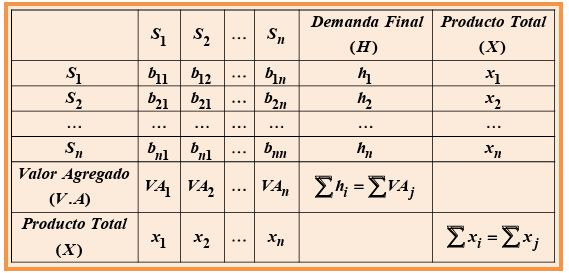

Definimos una nueva matriz, que llamaremos **A** (matriz de los coeficientes técnicos), cuyos elementos son los \( a_{ij} \), tal que:

$
a_{ij} = \frac{b_{ij}}{x_j}
$


$A =$
\begin{pmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{n1} & a_{n2} & \cdots & a_{nn}
\end{pmatrix}


Como cada columna representa la estructura de costos de cada sector, si se divide cada elemento $ b_{ij}$ por el producto total del sector $j$, o sea $ x_j $, se obtienen los coeficientes tecnológicos.

**$ a_{ij} $ es el valor de los bienes intermedios producidos por el sector
$i $, que el sector $ j $ necesita adquirir para producir una unidad.**

Se debe recordar que el subíndice \( i \) indica la industria vendedora y el subíndice \( j \) la industria compradora.

La regla práctica para calcular los coeficientes es dividir cada elemento $b_{ij} $ de la columna por el producto total que figura al pie de la misma.





Modelo Abierto de Leontief

$X=(I-A)^{-1} .H\Rightarrow$ expresión usada para determinar el producto total ante una variación de la demanda

## Caso 3


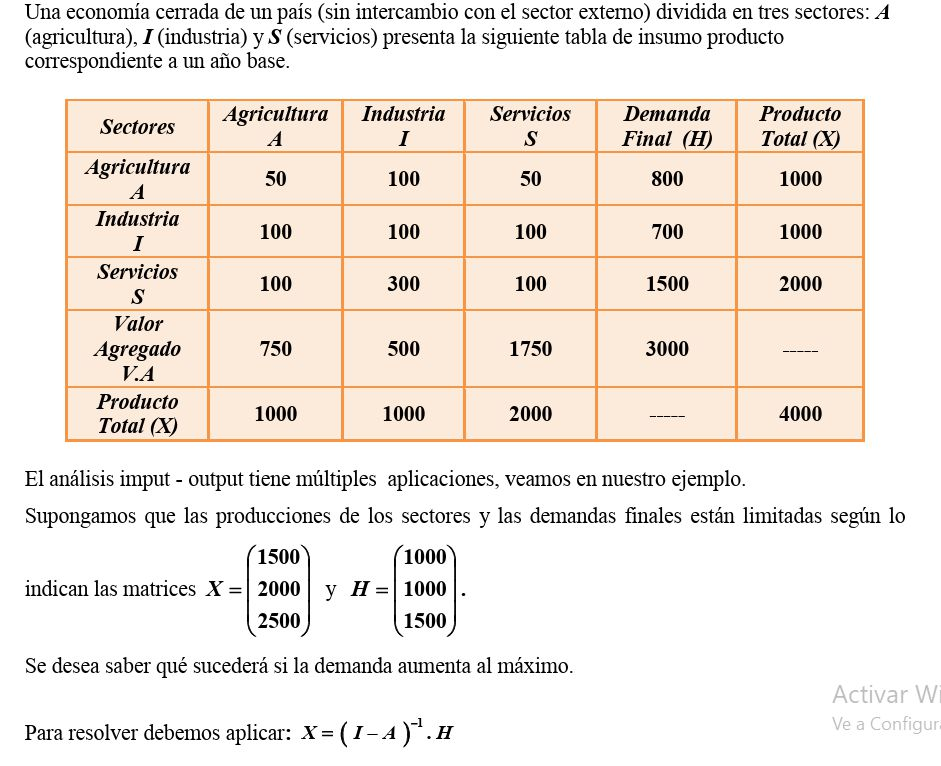

In [ ]:
#definimos las distintas submatrices que componen a la tabla
H= np.array([[1000],
             [1000],
             [1500]])
#matriz de coeficientes técnicos

A= np.array([[50/1000 , 100/1000,50/2000],
             [100/1000, 100/1000, 100/2000],
             [100/1000, 300/1000, 100/2000]]) #notese que hacer esto a mano es inviable cuando se trata de bases de datos reales, de a poco vamos a avanzar en cuanto a automatización
#matriz de los coeficientes de requerimientos
L= (np.identity(3)-A)
print(A)
print(L)

In [ ]:
#modelo abierto de Leontief
LL= np.linalg.inv(L)

In [ ]:
#ahora sí obtenemos la variación en el producto total si la demanda a final está al tope
X=np.dot(LL,H)
print(X)

Entonces cuando la demanda alcanza su límite, está puede ser satisfecha, pues los límites productivos están dados por

$X= \begin{pmatrix}
1500\\
2000\\
2500\end{pmatrix}$


# 🥇 ⚡ 🤓  Para tirar una matriz random

In [ ]:
def generar_matriz():
    #tamaño de la matriz
    while True:
        try:
            filas = int(input("Ingrese número de filas : "))
            columnas = int(input("Ingrese número de columnas : "))
            if filas > 0 and columnas > 0:
                break
            else:
                print("Deben ser números enteros positivos.")
        except ValueError:
            print("Entrada inválida. Ingrese enteros positivos.")

    #rango de valores
    while True:
        try:
            mínimo = float(input("Ingrese el valor mínimo: "))
            máximo = float(input("Ingrese el valor máximo: "))
            if mínimo <= máximo:
                break
            else:
                print("El mínimo no puede ser mayor que el máximo.")
        except ValueError:
            print("Entrada inválida. Ingrese números.")

    #tipo de número
    while True:
        tipo = input("¿Desea números enteros (E) o decimales (D)? ").strip().lower()
        if tipo in ["e", "d"]:
            break
        else:
            print("⚠️ Escriba 'E' para enteros o 'D' para decimales.")

    #generar matriz
    if tipo == "e":
        matriz = np.random.randint(int(mínimo), int(máximo) + 1, size=(filas, columnas))
    else:
        matriz = np.random.uniform(mínimo, máximo, size=(filas, columnas))

    print("\n✅ Matriz generada:")
    print(matriz)

    return matriz

#entonces por ejemplo
M = generar_matriz()


-Actividad propuesta

1.   Crear una matriz de producción para una Economía hipotética. Pueden agregar la cantidad de sectores que deseen
2.   Convertirla en una tabla de datos
3.   Incorporar una fila que muestre el valor agregado por sector, es decir, la diferencia entre el producto total y la suma del valor del sector.
4.   Suponer un cambio en la Demanda Final de cada sector y calcular cómo varía el Producto total en consecuencia.


Fuentes:

Notas de álgebra teórico-prácticas: cátedra de Álgebra / Alicia Delia Fraquelli;Andrea Leonor Gache. - 1a ed. - Ciudad Autónoma de Buenos Aires: Universidad de Buenos Aires. Facultad de Ciencias Económicas, 2019.

Hilpisch, Y. (2018). Python for Finance: Mastering Data-Driven Finance (2nd ed.). O’Reilly Media.